In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("uae_hospital_diabetes_dataset_with_region_area.csv")

In [4]:
df.head()

Visit_Date  Patient_ID  Age  Gender        Diagnosis Has_Insurance  \
0  2019-01-01        4174   28    Male  Type 1 Diabetes           Yes   
1  2019-01-01        4507   62  Female  Type 2 Diabetes           Yes   
2  2019-01-01        1860   47    Male      Prediabetes           Yes   
3  2019-01-01        2294   10  Female  Type 2 Diabetes           Yes   
4  2019-01-01        2130   66    Male  Type 2 Diabetes           Yes   

             Area  Total_Cost  Registration time  Nursing time  \
0  Downtown Dubai  711.975905               21.6          21.1   
1  Downtown Dubai  507.680147               13.0          50.9   
2  Downtown Dubai  317.582770               27.3          20.9   
3  Downtown Dubai  484.387822               19.2          30.8   
4  Downtown Dubai  118.649105               13.3          29.1   

   Laboratory time  Consultation time  Pharmacy time  
0             29.6               25.8           28.2  
1             34.8               26.3           23.2  
2             23.9               35.1           14.8  
3             22.9               20.6           21.9  
4             19.5               34.2           36.6

In [5]:
df.shape

(505000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505000 entries, 0 to 504999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Visit_Date         505000 non-null  object 
 1   Patient_ID         505000 non-null  int64  
 2   Age                505000 non-null  int64  
 3   Gender             494798 non-null  object 
 4   Diagnosis          472288 non-null  object 
 5   Has_Insurance      451050 non-null  object 
 6   Area               505000 non-null  object 
 7   Total_Cost         505000 non-null  float64
 8   Registration time  505000 non-null  float64
 9   Nursing time       505000 non-null  float64
 10  Laboratory time    505000 non-null  float64
 11  Consultation time  505000 non-null  float64
 12  Pharmacy time      505000 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 50.1+ MB


In [7]:
df.columns

Index(['Visit_Date', 'Patient_ID', 'Age', 'Gender', 'Diagnosis',
       'Has_Insurance', 'Area', 'Total_Cost', 'Registration time',
       'Nursing time', 'Laboratory time', 'Consultation time',
       'Pharmacy time'],
      dtype='object')

In [8]:
df.describe().T

count         mean          std          min  \
Patient_ID         505000.0  2999.228986  1154.146968  1000.000000   
Age                505000.0    34.814012    19.262851     0.000000   
Total_Cost         505000.0   431.173101   278.656191 -2039.938426   
Registration time  505000.0    32.016667    58.939869     0.000000   
Nursing time       505000.0    36.735041    58.241213     0.000000   
Laboratory time    505000.0    36.779022    58.220992     0.000000   
Consultation time  505000.0    36.696516    58.021551     0.000000   
Pharmacy time      505000.0    36.692586    58.067343     0.000000   

                           25%          50%          75%         max  
Patient_ID         2000.000000  2997.000000  3999.000000  4999.00000  
Age                  21.000000    34.000000    48.000000   100.00000  
Total_Cost          241.264883   386.130406   576.773329  2853.42993  
Registration time    14.300000    21.800000    30.000000   499.00000  
Nursing time         19.300000    26.800000    35.000000   499.00000  
Laboratory time      19.400000    26.900000    35.100000   499.00000  
Consultation time    19.300000    26.800000    35.000000   499.00000  
Pharmacy time        19.300000    26.800000    35.000000   499.00000

In [9]:
df.describe(include="O").T

count unique              top    freq
Visit_Date     505000   2192       2024-08-31     237
Gender         494798      3             Male  303448
Diagnosis      472288      7  Type 2 Diabetes  327064
Has_Insurance  451050      2              Yes  380038
Area           505000      9   Downtown Dubai  218636

In [10]:
df.isna().sum()

Visit_Date               0
Patient_ID               0
Age                      0
Gender               10202
Diagnosis            32712
Has_Insurance        53950
Area                     0
Total_Cost               0
Registration time        0
Nursing time             0
Laboratory time          0
Consultation time        0
Pharmacy time            0
dtype: int64

In [11]:
round(df.isna().sum()/df.shape[0]*100,3)

Visit_Date            0.000
Patient_ID            0.000
Age                   0.000
Gender                2.020
Diagnosis             6.478
Has_Insurance        10.683
Area                  0.000
Total_Cost            0.000
Registration time     0.000
Nursing time          0.000
Laboratory time       0.000
Consultation time     0.000
Pharmacy time         0.000
dtype: float64

In [12]:
df.duplicated().sum()

4243

### Data Cleaning

In [13]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [14]:
df.duplicated().sum()

0

In [15]:
for i in df.select_dtypes(include="O"):
    print(i)
    print(df[i].nunique())
    print(df[i].unique())
    print("-"*100)

Visit_Date
2192
['2019-01-01' '2019-01-02' '2019-01-03' ... '2024-12-29' '2024-12-30'
 '2024-12-31']
----------------------------------------------------------------------------------------------------
Gender
3
['Male' 'Female' nan 'Other']
----------------------------------------------------------------------------------------------------
Diagnosis
7
['Type 1 Diabetes' 'Type 2 Diabetes' 'Prediabetes' 'Type 3 Diabetes'
 'Gestational Diabetes' nan 'Unknown' ' ']
----------------------------------------------------------------------------------------------------
Has_Insurance
2
['Yes' nan 'No']
----------------------------------------------------------------------------------------------------
Area
9
['Downtown Dubai' 'Bur Dubai' 'Al Barsha' 'Jumeirah' 'Deira' 'Al Qusais'
 'Dubai Marina' 'International City' 'Dubai Silicon Oasis']
----------------------------------------------------------------------------------------------------


In [16]:
df.drop(columns="Patient_ID",inplace=True)

In [17]:
df.reset_index(inplace=True,drop=True)

In [18]:
for i in df.select_dtypes(include="O"):
    print(i)
    print(df[i].value_counts())
    print("-"*100)

Visit_Date
Visit_Date
2019-02-17    235
2019-02-09    234
2019-01-01    233
2019-03-02    233
2019-01-14    233
             ... 
2021-10-28    228
2021-10-27    228
2021-10-24    228
2021-10-23    228
2024-12-31      1
Name: count, Length: 2192, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Gender
Male      300921
Female    174707
Other      15011
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Diagnosis
Diagnosis
Type 2 Diabetes         327064
Type 1 Diabetes          46752
Prediabetes              46466
Gestational Diabetes     23273
                         14003
Type 3 Diabetes          10100
Unknown                   4630
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Has_Insurance
Has_Insurance
Yes    380038
No      71012
Name: count, dtype: int64
-

In [19]:
df.drop(df[df['Diagnosis'] == " "].index, inplace=True)


Age


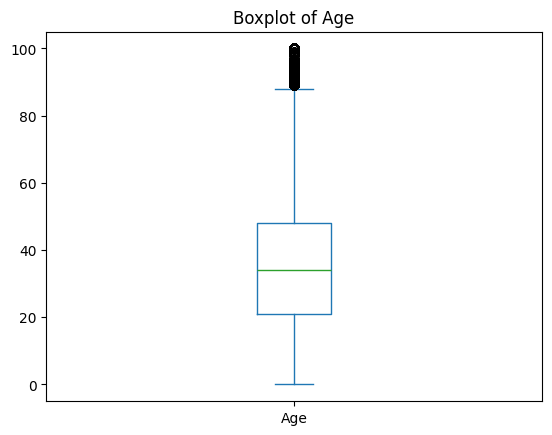

Total_Cost


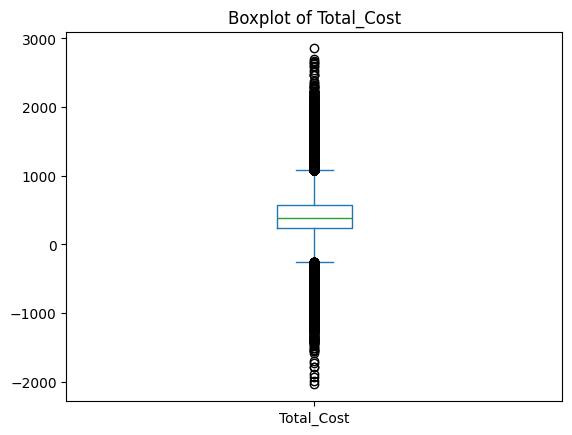

Registration time


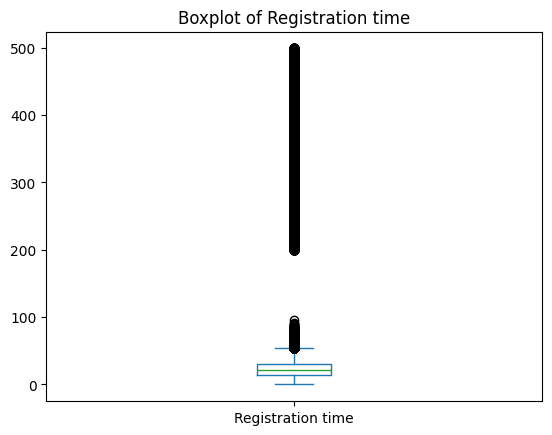

Nursing time


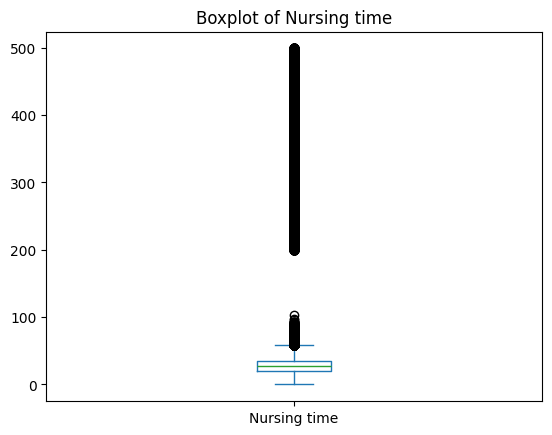

Laboratory time


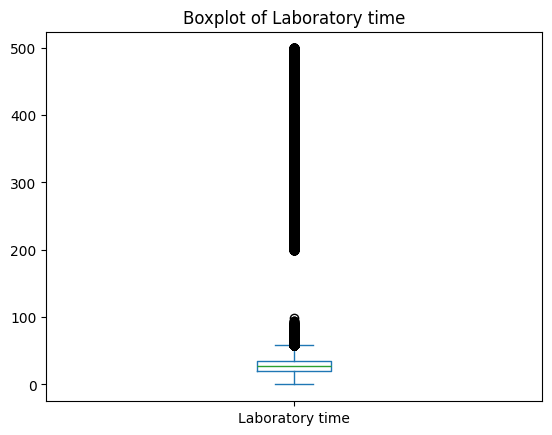

Consultation time


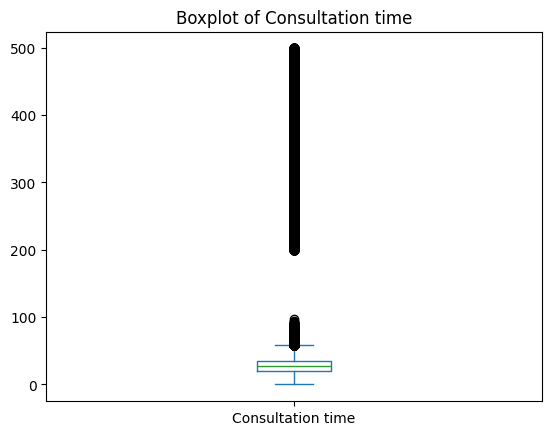

Pharmacy time


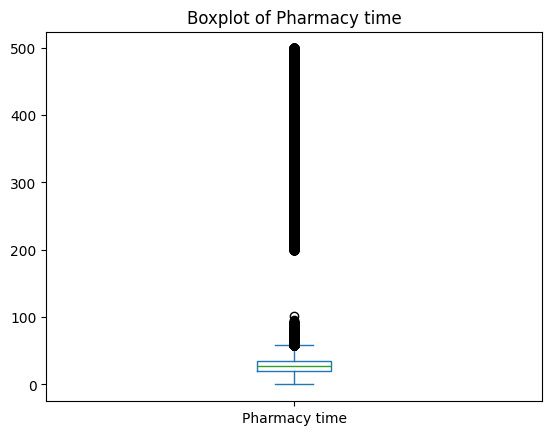

In [20]:
for i in df.select_dtypes(exclude="O"):
    print(i)
    df[i].plot.box()
    plt.title(f"Boxplot of {i}")
    plt.show()

### Feautre Engineering

In [21]:
df.Visit_Date=pd.to_datetime(df["Visit_Date"])
df["Year"]=df.Visit_Date.dt.year
df["Month"]=df.Visit_Date.dt.month_name()
df["Day"]=df.Visit_Date.dt.day_name()


In [22]:
df.drop(columns="Visit_Date",inplace=True)

In [23]:
df[["Year", "Month","Day"]]


Year      Month        Day
0       2019    January    Tuesday
1       2019    January    Tuesday
2       2019    January    Tuesday
3       2019    January    Tuesday
4       2019    January    Tuesday
...      ...        ...        ...
500752  2020       June     Monday
500753  2019    January    Tuesday
500754  2019  September  Wednesday
500755  2020   November  Wednesday
500756  2022    October     Friday

[486754 rows x 3 columns]

In [24]:
df

Age  Gender        Diagnosis Has_Insurance                Area  \
0        28    Male  Type 1 Diabetes           Yes      Downtown Dubai   
1        62  Female  Type 2 Diabetes           Yes      Downtown Dubai   
2        47    Male      Prediabetes           Yes      Downtown Dubai   
3        10  Female  Type 2 Diabetes           Yes      Downtown Dubai   
4        66    Male  Type 2 Diabetes           Yes      Downtown Dubai   
...     ...     ...              ...           ...                 ...   
500752   28    Male  Type 3 Diabetes           NaN               Deira   
500753   20  Female              NaN           NaN           Al Qusais   
500754   25    Male              NaN           NaN      Downtown Dubai   
500755   42    Male              NaN           NaN  International City   
500756   35  Female  Type 3 Diabetes           NaN      Downtown Dubai   

        Total_Cost  Registration time  Nursing time  Laboratory time  \
0       711.975905               21.6          21.1             29.6   
1       507.680147               13.0          50.9             34.8   
2       317.582770               27.3          20.9             23.9   
3       484.387822               19.2          30.8             22.9   
4       118.649105               13.3          29.1             19.5   
...            ...                ...           ...              ...   
500752  866.951166              364.0         400.0            321.0   
500753  898.989392               31.5          31.3             24.2   
500754  400.414202               28.8          25.3             21.7   
500755  306.120743                6.6          28.5             46.6   
500756 -560.601601              454.0         242.0            498.0   

        Consultation time  Pharmacy time  Year      Month        Day  
0                    25.8           28.2  2019    January    Tuesday  
1                    26.3           23.2  2019    January    Tuesday  
2                    35.1           14.8  2019    January    Tuesday  
3                    20.6           21.9  2019    January    Tuesday  
4                    34.2           36.6  2019    January    Tuesday  
...                   ...            ...   ...        ...        ...  
500752              462.0          379.0  2020       June     Monday  
500753               19.3           16.9  2019    January    Tuesday  
500754               18.4           31.1  2019  September  Wednesday  
500755               40.5           40.7  2020   November  Wednesday  
500756              222.0          346.0  2022    October     Friday  

[486754 rows x 14 columns]

### Analysis

In [25]:
q1=df.Area.value_counts().reset_index()
q1

Area   count
0       Downtown Dubai  210766
1            Al Barsha   58120
2             Jumeirah   58101
3                Deira   32100
4            Bur Dubai   31708
5   International City   24861
6         Dubai Marina   24613
7  Dubai Silicon Oasis   23377
8            Al Qusais   23108

In [26]:
px.bar(data_frame=q1,x="Area",y='count',title="What are the most common diagnoses?")

In [27]:
q2=df.Gender.value_counts().reset_index()
q2

Gender   count
0    Male  292651
1  Female  169697
2   Other   14565

In [28]:
px.pie(data_frame=q2,names="Gender",title="What are the most common Gender?")

In [29]:
q3=df.Has_Insurance.value_counts().reset_index()
q3

Has_Insurance   count
0           Yes  368977
1            No   68808

In [30]:
px.pie(data_frame=q3,names="Has_Insurance",title="What are the most common Insurance?")

In [31]:
px.histogram(data_frame=df,x="Age",title="What distribuation of Age")

In [32]:
q4=df.Diagnosis.value_counts().reset_index()
q4

Diagnosis   count
0       Type 2 Diabetes  327064
1       Type 1 Diabetes   46752
2           Prediabetes   46466
3  Gestational Diabetes   23273
4       Type 3 Diabetes   10100
5               Unknown    4630

In [33]:
px.bar(data_frame=q4,x="Diagnosis",y="count",title="What are the most common diagnoses?")

In [34]:
q6=df.groupby('Has_Insurance')['Total_Cost'].mean().reset_index()
q6


Has_Insurance  Total_Cost
0            No  392.922067
1           Yes  441.992997

In [35]:
px.pie(data_frame=q6,names="Has_Insurance",values='Total_Cost',title='Is there a difference in the average cost of treatment between those with insurance and those without?')

In [36]:
q7=df.groupby('Gender')['Consultation time'].mean().reset_index()
q7


Gender  Consultation time
0  Female          37.046820
1    Male          36.932850
2   Other          37.701256

In [37]:
px.pie(data_frame=q7,names="Gender",values='Consultation time',title='Is there a difference in the consultation duration between males and females?')

In [ ]:

yearly_visits = df['Year'].value_counts().sort_index()
fig = px.line(x=yearly_visits.index, y=yearly_visits.values, labels={'x': 'Year', 'y': 'Number of Visits'}, title='Number of Visits per Year')
fig.show()


In [40]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

monthly_visits = df['Month'].value_counts().reindex(months_order)
fig = px.line(x=monthly_visits.index, y=monthly_visits.values, labels={'x': 'Month', 'y': 'Number of Visits'}, title='Number of Visits per Month')
fig.show()


In [42]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_visits = df['Day'].value_counts().reindex(days_order)
fig = px.line(x=day_visits.index, y=day_visits.values, labels={'x': 'Day', 'y': 'Number of Visits'}, title='Number of Visits by Day of the Week')
fig.show()


In [44]:
monthly_cost = df.groupby('Month')['Total_Cost'].mean().reindex(months_order)
fig = px.line(x=monthly_cost.index, y=monthly_cost.values, labels={'x': 'Month', 'y': 'Average Total Cost'}, title='Average Treatment Cost per Month')
fig.show()


In [45]:
consultation_by_year = df.groupby('Year')['Consultation time'].mean()
fig = px.line(x=consultation_by_year.index, y=consultation_by_year.values, labels={'x': 'Year', 'y': 'Average Consultation Time'}, title='Consultation Time over the Years')
fig.show()


In [ ]:
visits_by_year_gender = df.groupby(['Year', 'Gender']).size().reset_index(name='Visit_Count')

fig = px.line(visits_by_year_gender, x='Year', y='Visit_Count', color='Gender',
              title='Number of Visits per Year by Gender',
              markers=True)
fig.show()

c:\Users\Sigma\Anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [48]:
visits_by_year_insurance = df.groupby(['Year', 'Has_Insurance']).size().reset_index(name='Visit_Count')

fig = px.line(visits_by_year_insurance, x='Year', y='Visit_Count', color='Has_Insurance',
              title='Number of Visits per Year by Insurance Status',
              markers=True)
fig.show()


c:\Users\Sigma\Anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [53]:

q11 = df.groupby(['Month', 'Gender'])['Total_Cost'].mean().reset_index()
q11['Month'] = pd.Categorical(q11['Month'], categories=months_order, ordered=True)
q11 = q11.sort_values('Month')

fig = px.line(q11, x='Month', y='Total_Cost', color='Gender',
              title='Average Treatment Cost per Month by Gender',
              markers=True)
fig.show()


c:\Users\Sigma\Anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [58]:
correlation_matrix = df.select_dtypes(exclude='O').corr()
correlation_matrix


Age  Total_Cost  Registration time  Nursing time  \
Age                1.000000    0.001739           0.001129      0.000308   
Total_Cost         0.001739    1.000000          -0.178289     -0.176748   
Registration time  0.001129   -0.178289           1.000000      0.900809   
Nursing time       0.000308   -0.176748           0.900809      1.000000   
Laboratory time    0.000830   -0.177233           0.901218      0.899462   
Consultation time  0.000107   -0.177680           0.901472      0.898196   
Pharmacy time      0.000317   -0.178262           0.902027      0.899656   
Year               0.000840   -0.001125          -0.000759     -0.000201   

                   Laboratory time  Consultation time  Pharmacy time      Year  
Age                       0.000830           0.000107       0.000317  0.000840  
Total_Cost               -0.177233          -0.177680      -0.178262 -0.001125  
Registration time         0.901218           0.901472       0.902027 -0.000759  
Nursing time              0.899462           0.898196       0.899656 -0.000201  
Laboratory time           1.000000           0.899317       0.898836 -0.000699  
Consultation time         0.899317           1.000000       0.898224 -0.001293  
Pharmacy time             0.898836           0.898224       1.000000 -0.000658  
Year                     -0.000699          -0.001293      -0.000658  1.000000

In [65]:
px.imshow(correlation_matrix,
                text_auto=True,
                title='Correlation Heatmap of Numeric Features',width=800,
                height=600).show()
